<a href="https://colab.research.google.com/github/sergiochaza/Analisis_de_Cliente/blob/main/Analisis_de_Cliente_Chazarreta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"Análisis Estratégico del Comportamiento de Clientes y Simulación de Rentabilidad en eCommerce Multicanal"**

##*Abstract*

Este proyecto tiene como objetivo analizar el comportamiento de los clientes de una empresa de e-commerce multicanal a partir de datos históricos de consumo, características demográficas e interacción con campañas promocionales. A través de un proceso de análisis exploratorio (EDA) se identificarán patrones que permitan construir una segmentación estratégica y validar hipótesis clave sobre los factores que determinan el valor futuro de los clientes.

Además, se propone desarrollar dos modelos predictivos con aplicación directa en decisiones comerciales:

Una simulación de rentabilidad futura, estimando qué clientes generarán mayor ganancia neta a partir de su comportamiento histórico.

Un modelo de propensión multicanal, que permita predecir cuál es el canal de compra preferido u óptimo de cada cliente (Web, Catálogo o Tienda).

Estos modelos permitirán a la empresa optimizar recursos, diseñar campañas personalizadas y maximizar el valor de cada cliente según su perfil.



##*Problematica*




Las empresas de e-commerce enfrentan el desafío constante de identificar:

Qué clientes tienen mayor valor a largo plazo,

Cómo contactarlos de forma eficiente,

Y por qué canal dirigirse a ellos para lograr mejores tasas de conversión.

Contar con modelos que anticipen estos comportamientos permite mejorar la toma de decisiones estratégicas, reducir costos de adquisición y maximizar ingresos netos.

##*Hipótesis*

* Los ingresos altos se asocian a mayor gasto en productos premium
* La edad influye en el canal de compra preferido
* Los clientes que compran en ciertos canales o consumen ciertas categorías de productos tienen más probabilidad de quejarse.

##*EDA*

El análisis exploratorio buscará:

* Entender la distribución y calidad de los datos

* Detectar correlaciones relevantes y patrones de consumo

* Validar o refutar hipótesis de negocio

* Construir variables sintéticas para el modelado (como gasto total, índice de rentabilidad, canal dominante)

#**Carga y Visualización de datos**




In [2]:
#Importamos librerias que vamos a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Guardamos el dataset en una variable
url ="https://raw.githubusercontent.com/nailson/ifood-data-business-analyst-test/master/ifood_df.csv"

In [4]:
#Creamos el DataFrame
df = pd.read_csv(url, sep=",")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [5]:
#Chequeamos las columnas
df.columns.tolist()

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

In [6]:
#Para mayor comodidad y entendimiento, decido cambiar de idioma el nombre de las columnas
df.columns = [
    'ingreso',
    'hijos_en_casa',
    'adolescentes_en_casa',
    'recencia',
    'gasto_vinos',
    'gasto_frutas',
    'gasto_carnes',
    'gasto_pescado',
    'gasto_dulces',
    'gasto_oro',
    'num_promociones_compradas',
    'compras_web',
    'compras_catalogo',
    'compras_tienda',
    'visitas_web_ult_mes',
    'acepto_promo_3',
    'acepto_promo_4',
    'acepto_promo_5',
    'acepto_promo_1',
    'acepto_promo_2',
    'se_quejo',
    'costo_contacto',
    'ingreso_contacto',
    'respuesta_campaña',
    'edad',
    'antiguedad_cliente_dias',
    'estado_civil_divorciado',
    'estado_civil_casado',
    'estado_civil_soltero',
    'estado_civil_convive',
    'estado_civil_viudo',
    'educacion_segundo_ciclo',
    'educacion_basica',
    'educacion_graduado',
    'educacion_master',
    'educacion_doctorado',
    'gasto_total',
    'gasto_productos_regulares',
    'total_promos_aceptadas'
]

In [7]:
#Chequeamos si hubo cambios
df

,ingreso,hijos_en_casa,adolescentes_en_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,gasto_oro,...,estado_civil_convive,estado_civil_viudo,educacion_segundo_ciclo,educacion_basica,educacion_graduado,educacion_master,educacion_doctorado,gasto_total,gasto_productos_regulares,total_promos_aceptadas
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


##*Informacion general*
* Describe
* Info
* Head
* Tail

In [8]:
#Realizamos el chequeo general de datos:
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingreso                    2205 non-null   float64
 1   hijos_en_casa              2205 non-null   int64  
 2   adolescentes_en_casa       2205 non-null   int64  
 3   recencia                   2205 non-null   int64  
 4   gasto_vinos                2205 non-null   int64  
 5   gasto_frutas               2205 non-null   int64  
 6   gasto_carnes               2205 non-null   int64  
 7   gasto_pescado              2205 non-null   int64  
 8   gasto_dulces               2205 non-null   int64  
 9   gasto_oro                  2205 non-null   int64  
 10  num_promociones_compradas  2205 non-null   int64  
 11  compras_web                2205 non-null   int64  
 12  compras_catalogo           2205 non-null   int64  
 13  compras_tienda       

In [9]:
#Visualizamos la información estadistica
print("Descripción estadística:")
print(df.describe())

Descripción estadística:
             ingreso  hijos_en_casa  adolescentes_en_casa     recencia  \
count    2205.000000    2205.000000           2205.000000  2205.000000   
mean    51622.094785       0.442177              0.506576    49.009070   
std     20713.063826       0.537132              0.544380    28.932111   
min      1730.000000       0.000000              0.000000     0.000000   
25%     35196.000000       0.000000              0.000000    24.000000   
50%     51287.000000       0.000000              0.000000    49.000000   
75%     68281.000000       1.000000              1.000000    74.000000   
max    113734.000000       2.000000              2.000000    99.000000   

       gasto_vinos  gasto_frutas  gasto_carnes  gasto_pescado  gasto_dulces  \
count  2205.000000   2205.000000   2205.000000    2205.000000   2205.000000   
mean    306.164626     26.403175    165.312018      37.756463     27.128345   
std     337.493839     39.784484    217.784507      54.824635     41.13

In [10]:
#Chequeamos las primeras 5 filas
df.head()

,ingreso,hijos_en_casa,adolescentes_en_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,gasto_oro,...,estado_civil_convive,estado_civil_viudo,educacion_segundo_ciclo,educacion_basica,educacion_graduado,educacion_master,educacion_doctorado,gasto_total,gasto_productos_regulares,total_promos_aceptadas
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [11]:
#Chequeamos las ultimas 5 filas
df.tail()

,ingreso,hijos_en_casa,adolescentes_en_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,gasto_oro,...,estado_civil_convive,estado_civil_viudo,educacion_segundo_ciclo,educacion_basica,educacion_graduado,educacion_master,educacion_doctorado,gasto_total,gasto_productos_regulares,total_promos_aceptadas
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [12]:
#Chequemos tamaño y cantidad de filas y columnas
print("Tamaño del DataFrame:", df.shape)
print("Cantidad de filas:", df.size)

Tamaño del DataFrame: (2205, 39)
Cantidad de filas: 85995


In [13]:
#Chequeamos valores nulos, en este caso no hace falta porque coinciden
#la cantidad de filas con los valores de la columna
df.isnull().sum().to_frame().T

,ingreso,hijos_en_casa,adolescentes_en_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,gasto_oro,...,estado_civil_convive,estado_civil_viudo,educacion_segundo_ciclo,educacion_basica,educacion_graduado,educacion_master,educacion_doctorado,gasto_total,gasto_productos_regulares,total_promos_aceptadas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Chequeamos valores duplicados
df_duplicado = df.duplicated().sum()
print("Cantidad de valores duplicados:", df_duplicado)

Cantidad de valores duplicados: 184


In [15]:
#Eliminamos todas las filas duplicadas
df_limpio = df.drop_duplicates()
df_limpio

,ingreso,hijos_en_casa,adolescentes_en_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,gasto_oro,...,estado_civil_convive,estado_civil_viudo,educacion_segundo_ciclo,educacion_basica,educacion_graduado,educacion_master,educacion_doctorado,gasto_total,gasto_productos_regulares,total_promos_aceptadas
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [16]:
#Chequeamos de vuelta si quedó algún duplicado
df_limpio.duplicated().sum()

np.int64(0)

In [17]:
#Para mayor comodidad pegamos una mirada a todas las columnas
pd.set_option('display.max_columns', None)
df_limpio.head()

,ingreso,hijos_en_casa,adolescentes_en_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,gasto_oro,num_promociones_compradas,compras_web,compras_catalogo,compras_tienda,visitas_web_ult_mes,acepto_promo_3,acepto_promo_4,acepto_promo_5,acepto_promo_1,acepto_promo_2,se_quejo,costo_contacto,ingreso_contacto,respuesta_campaña,edad,antiguedad_cliente_dias,estado_civil_divorciado,estado_civil_casado,estado_civil_soltero,estado_civil_convive,estado_civil_viudo,educacion_segundo_ciclo,educacion_basica,educacion_graduado,educacion_master,educacion_doctorado,gasto_total,gasto_productos_regulares,total_promos_aceptadas
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


#**Visualización y EDA**



#**Hipotesis 1**
"Los ingresos altos se asocian a un mayor gasto en productos premium como vinos y oro."

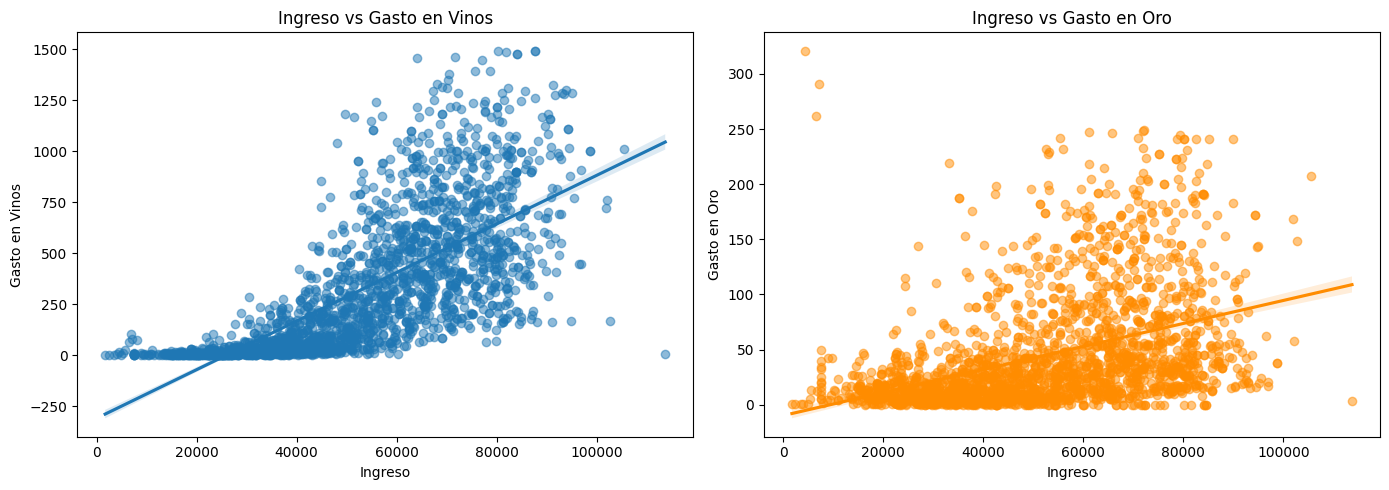

In [18]:
#Regresión de ingreso y gasto
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.regplot(data=df, x="ingreso", y="gasto_vinos", ax=axs[0], scatter_kws={'alpha':0.5})
axs[0].set_title("Ingreso vs Gasto en Vinos")
axs[0].set_xlabel("Ingreso")
axs[0].set_ylabel("Gasto en Vinos")

sns.regplot(data=df, x="ingreso", y="gasto_oro", ax=axs[1], scatter_kws={'alpha':0.5}, color='darkorange')
axs[1].set_title("Ingreso vs Gasto en Oro")
axs[1].set_xlabel("Ingreso")
axs[1].set_ylabel("Gasto en Oro")

plt.tight_layout()
plt.show()

Regresión ingreso vs. gasto:
Ingreso vs. Gasto en Vinos:
El gráfico de dispersión con línea de regresión muestra una fuerte correlación positiva, evidenciando que a mayor ingreso, el gasto en vinos aumenta de forma consistente.

Ingreso vs. Gasto en Oro:
También se observa una relación positiva, pero con mayor dispersión y presencia de valores atípicos, lo que reduce la linealidad del patrón.

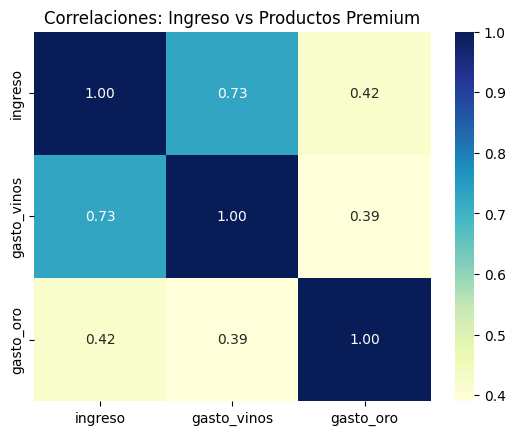

In [19]:
#Correlacion entre ingresos y gastos costosos
corr = df[["ingreso", "gasto_vinos", "gasto_oro"]].corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlaciones: Ingreso vs Productos Premium")
plt.show()

###*Conclusión Hipotesis 1*

La hipótesis se valida parcialmente:

Confirmada para el caso de los vinos, donde el ingreso se asocia fuertemente al aumento en el gasto.

Menos concluyente para el oro, donde la relación es más débil y posiblemente influenciada por otros factores como promociones, regalos u ocasiones especiales.



#**Hipotesis 2**

La edad influye en el canal de compra preferido

In [20]:
#Creamos una funcion devolver la cantidad de compras por canales
def canal_preferido(row):
    canales = {
        'web': row['compras_web'],
        'catalogo': row['compras_catalogo'],
        'tienda': row['compras_tienda']
    }
    return max(canales, key=canales.get)

df['canal_preferido'] = df.apply(canal_preferido, axis=1)

# Agrupar edad en rangos, para tener una estandarizacion
bins = [17, 30, 45, 60, 100]
labels = ['18-29', '30-44', '45-59', '60+']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels)

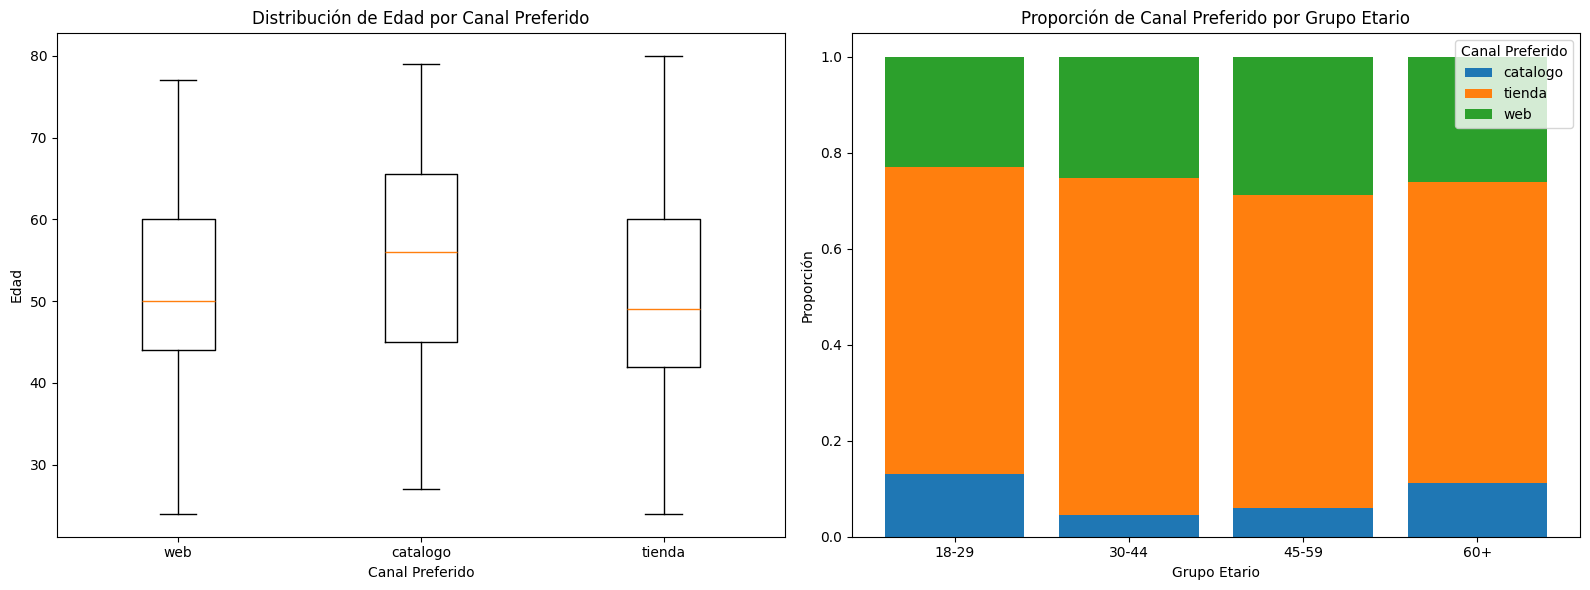

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

#Conocemos los valores de canal preferido, su rango de edad
web = df[df['canal_preferido'] == 'web']['edad']
catalogo = df[df['canal_preferido'] == 'catalogo']['edad']
tienda = df[df['canal_preferido'] == 'tienda']['edad']

axs[0].boxplot(
    [web, catalogo, tienda],
    tick_labels=['web', 'catalogo', 'tienda']
)
axs[0].set_title('Distribución de Edad por Canal Preferido')
axs[0].set_xlabel('Canal Preferido')
axs[0].set_ylabel('Edad')

#Segmentamos y conocemos la preferencia de grupo etario
tabla = pd.crosstab(df['grupo_edad'], df['canal_preferido'])
proporciones = tabla.div(tabla.sum(axis=1), axis=0)

bottom = [0] * len(proporciones)
for canal in proporciones.columns:
    axs[1].bar(proporciones.index.astype(str), proporciones[canal], bottom=bottom, label=canal)
    bottom = [i + j for i, j in zip(bottom, proporciones[canal])]

axs[1].set_title('Proporción de Canal Preferido por Grupo Etario')
axs[1].set_xlabel('Grupo Etario')
axs[1].set_ylabel('Proporción')
axs[1].legend(title='Canal Preferido')

plt.tight_layout()
plt.show()

##*Conclusión Hipotesis 2*

Boxplot – Edad por Canal Preferido
Se observa que los tres canales (web, catálogo, tienda) presentan una distribución de edad similar en forma, pero con ligeras diferencias en la mediana.

El canal catálogo tiende a concentrar usuarios de mayor edad en promedio.

El canal web tiene una mayor proporción de usuarios jóvenes, aunque también con dispersión.

Barras Apiladas – Canal Preferido por Grupo Etario
El grupo 18-29 muestra mayor inclinación por la web.

En 30-44 y 45-59 se diversifica el comportamiento, aunque el canal tienda mantiene relevancia.

En el grupo 60+, predominan las compras por catálogo y tienda, con menor participación de la web.



La hipótesis queda validada visualmente:
Existe una tendencia clara donde los usuarios más jóvenes prefieren la web, mientras que los adultos mayores se inclinan más por el catálogo y tienda física.
Esto sugiere que la edad influye en el canal de compra preferido, aunque sería útil reforzar esta observación con un test estadístico.

#**Hipotesis 3**

"Los clientes que compran en ciertos canales o consumen ciertas categorías de productos tienen más probabilidad de quejarse."

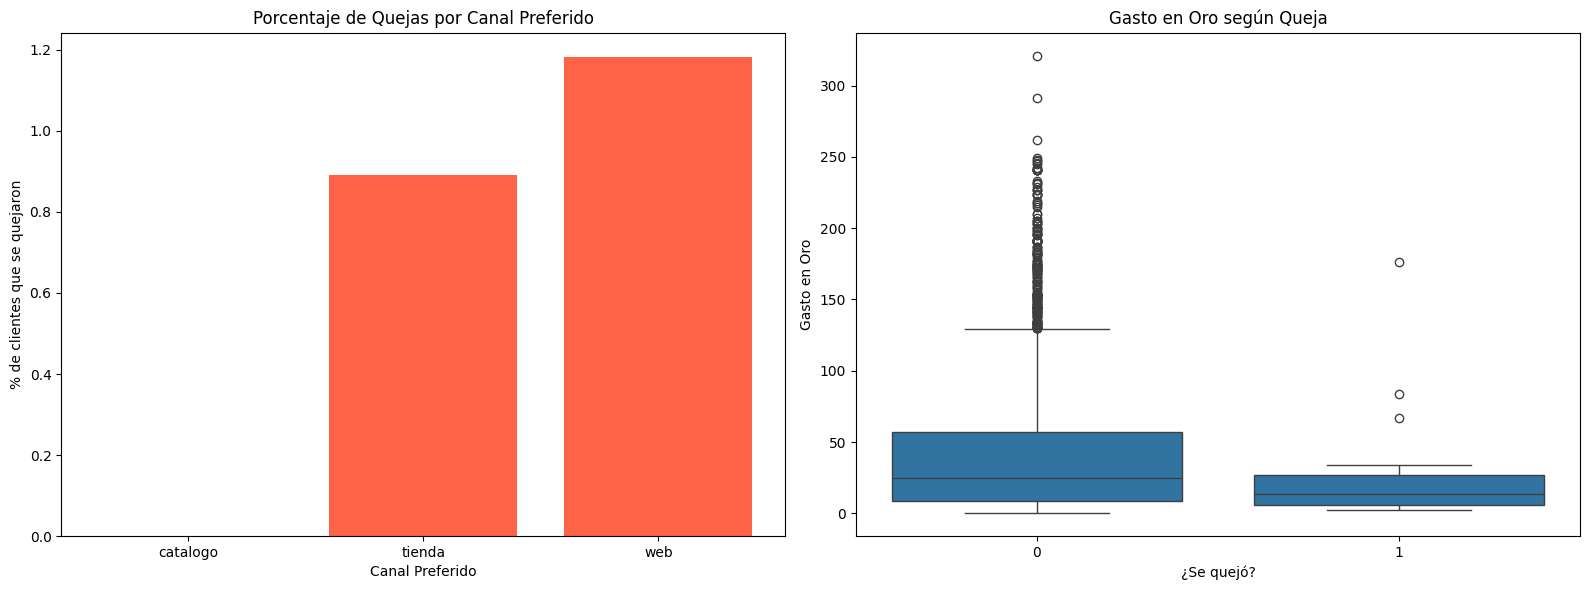

In [27]:
#Porcentajes % de quejas por canal
quejas_por_canal = df.groupby('canal_preferido')['se_quejo'].mean() * 100

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].bar(quejas_por_canal.index, quejas_por_canal.values, color='tomato')
axs[0].set_title('Porcentaje de Quejas por Canal Preferido')
axs[0].set_ylabel('% de clientes que se quejaron')
axs[0].set_xlabel('Canal Preferido')


#Gasto en producto vs. queja
sns.boxplot(data=df, x='se_quejo', y='gasto_oro', ax=axs[1])
axs[1].set_title('Gasto en Oro según Queja')
axs[1].set_xlabel('¿Se quejó?')
axs[1].set_ylabel('Gasto en Oro')

plt.tight_layout()
plt.show()


##*Conclusión Hipotesis 3*

Porcentaje de Quejas por Canal Preferido
El canal catálogo presenta la menor proporción de quejas.
Esto podría deberse a que el cliente puede visualizar claramente la oferta, comparar, y comprar sin necesidad de intermediarios o atención personalizada.

En contraste, los canales tienda (física) y web tienen una mayor proporción de reclamos.
 Esto puede estar asociado a problemas de atención, fallas en la experiencia de compra o falta de profesionalización del canal.

Gasto en Oro según Queja
El gasto en productos caros como el oro es mayor entre los clientes que no se quejan.

Los que se quejan tienden a gastar menos en estos productos premium.

 Esto sugiere que:

Los productos de alto valor suelen estar asociados a mejor atención, calidad y experiencia, lo que disminuye la probabilidad de queja.

O bien, los compradores más exigentes y de alto ticket reciben un tratamiento preferencial, reduciendo el conflicto.

**Conclusión**
La hipótesis queda validada parcialmente:

Sí existe una asociación clara entre el canal de compra y la proporción de quejas: el canal catálogo es el más estable y con menos fricción.

En cuanto a las categorías de producto, los productos premium como el oro no generan más quejas, al contrario: suelen tener menos.

